## Code for Non-Revealing Game

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import copy

In /home/doi5/anaconda3/envs/siren/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/doi5/anaconda3/envs/siren/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/doi5/anaconda3/envs/siren/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/doi5/anaconda3/envs/siren/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/doi5/anaconda3/envs/siren/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and w

### Helper Functions

In [3]:
# Helper function to print the payoff table
def printMatrix(s):

    # Do heading
    print("     ", end="")
    for j in range(len(s[0])):
        print("%5s " % j, end="")
    print()
    print("     ", end="")
    for j in range(len(s[0])):
        print("------", end="")
    print()
    # Matrix contents
    for i in range(len(s)):
        print("%3s |" % (i), end="") # Row nums
        for j in range(len(s[0])):
            if type(s[i][j]) == np.float64:
                temp = round(s[i][j], 2)
            else:
                temp = s[i][j]
            print("%5s " % (temp), end="")
        print()

In [4]:
# get average payoff matrix of two types
def get_av_val(val_r, val_l, p):
    return p*val_l + (1-p)*val_r

In the non-revealing game, we need to build the value function as: $V(x, t, p) = cav\;\;\min_u \max_v V(x', t+1, p)$. Previously we just built it as: $V(x, t, p) = \min_u \max_v V(x', t+1, p)$

### Game Settings

In [5]:
num_states = 5
s = np.linspace(0, num_states-1, num_states)
states = np.array(list(itertools.product(s, repeat=2)))

### Value Function for any time t

In [6]:
def get_inter_value(timestep, game_dict, states, returnstate=0):
    
    def get_game_dict(timestep, game_dict, states, valuefun = get_inter_value):
        return valuefun(timestep, game_dict, states, returnstate=1)
    
    # get game dict for t-1 timestep to calculate value at t
    if timestep > 1 and returnstate ==0:
        temp_game = copy.deepcopy(game_dict)
        for i in range(1, timestep):
            average, _ = get_game_dict(i, temp_game, states)
            temp_game = dict(zip(states.flatten(), average.flatten()))

        game_dict = copy.deepcopy(temp_game)
#         printMatrix(average)
    
    
    temp = np.full(states.shape, np.nan)
    action = np.full(states.shape, '%', dtype='U25')
    p1_amap = {'0': 'l', '1': 'L', '2': 'r', '3': 'R'}
    p2_amap = {'0': 'l', '1': 'r'}
        
        
    # first row value # min max
    for i in range(timestep):
        for j in range(timestep, num_states-timestep):
#             temp[i, j] = game_dict[states[i, j]]
            payoff = np.zeros((4, 2)) 
            if i - 1 < 0:
                new_L = i
                new_l = i
            elif i - 2 < 0:
                new_L = i - 1
                new_l = i - 1
            else:
                new_l = i - 1
                new_L = i - 2
            
            payoff[0, 0] = game_dict[states[new_l, j-1]] # left left
            payoff[0, 1] = game_dict[states[new_l, j+1]] # left right
            payoff[1, 0] = game_dict[states[new_L, j-1]] # Left left
            payoff[1, 1] = game_dict[states[new_L, j+1]] # Left right
            payoff[2, 0] = game_dict[states[i+1, j-1]] # right left
            payoff[2, 1] = game_dict[states[i+1, j+1]] # right right
            payoff[3, 0] = game_dict[states[i+2, j-1]] # Right left
            payoff[3, 1] = game_dict[states[i+2, j+1]] # Right right
        
            # find maximin
            temp[i, j] = np.max(np.min(payoff, 1))
            action_idx = np.where(np.min(payoff, 1) == temp[i, j])[0] # check for same values
            if len(action_idx) == 1:
                action[i, j] = p1_amap[str(action_idx[0])] 
            elif len(action_idx) == 4:
                action[i, j] = 'A'
            else:
                ac = ''
                for a in action_idx:
                    ac += p1_amap[str(a)]
                action[i, j] = ac
    
#     printMatrix(temp)
    # last row value
    for i in range(num_states - timestep, num_states):
        for j in range(timestep, num_states-timestep):
#             temp[i, j] = game_dict[states[i, j]]
            payoff = np.zeros((4, 2)) 
            if i + 1 > num_states - 1:
                new_R = i
                new_r = i
            elif i + 2 > num_states - 1:
                new_r = i + 1 
                new_R = i + 1
            else:
                new_r = i + 1
                new_R = i + 2
            
            payoff[0, 0] = game_dict[states[i-1, j-1]] # left left
            payoff[0, 1] = game_dict[states[i-1, j+1]] # left right
            payoff[1, 0] = game_dict[states[i-2, j-1]] # Left left
            payoff[1, 1] = game_dict[states[i-2, j+1]] # Left right
            payoff[2, 0] = game_dict[states[new_r, j-1]] # right left
            payoff[2, 1] = game_dict[states[new_r, j+1]] # right right
            payoff[3, 0] = game_dict[states[new_R, j-1]] # Right left
            payoff[3, 1] = game_dict[states[new_R, j+1]] # Right right
        
            # find maximin
            temp[i, j] = np.max(np.min(payoff, 1))
            action_idx = np.where(np.min(payoff, 1) == temp[i, j])[0] # check for same values
            if len(action_idx) == 1:
                action[i, j] = p1_amap[str(action_idx[0])] 
            elif len(action_idx) == 4:
                action[i, j] = 'A'
            else:
                ac = ''
                for a in action_idx:
                    ac += p1_amap[str(a)]
                action[i, j] = ac

        
    for i in range(timestep, num_states - timestep): # row
        for j in range(timestep, num_states - timestep): # column
            payoff = np.zeros((4, 2)) # payoff matrix for each game
            if i - 2 < 0:
                new_l = i - 1
            else:
                new_l = i - 2
            if i + 2 > num_states - 1: #14:
                new_r = i + 1
            else:
                new_r = i + 2
                
            payoff[0, 0] = game_dict[states[i-1, j-1]] # left left
            payoff[0, 1] = game_dict[states[i-1, j+1]] # left right
            payoff[1, 0] = game_dict[states[new_l, j-1]] # Left left
            payoff[1, 1] = game_dict[states[new_l, j+1]] # Left right
            payoff[2, 0] = game_dict[states[i+1, j-1]] # right left
            payoff[2, 1] = game_dict[states[i+1, j+1]] # right right
            payoff[3, 0] = game_dict[states[new_r, j-1]] # Right left
            payoff[3, 1] = game_dict[states[new_r, j+1]] # Right right

            # find maximin
            temp[i, j] = np.max(np.min(payoff, 1))
            action_idx = np.where(np.min(payoff, 1) == temp[i, j])[0] # check for same values
            if len(action_idx) == 1:
                action[i, j] = p1_amap[str(action_idx[0])] 
            elif len(action_idx) == 4:
                action[i, j] = 'A'
            else:
                ac = ''
                for a in action_idx:
                    ac += p1_amap[str(a)]
                action[i, j] = ac

    return temp, action

### Some Tests

In [7]:
# payoff for P1: Type Left
val_L_T = np.zeros((len(s), len(s)))
for i in range(num_states):
    val_L_T[np.triu_indices(num_states, k = i)] = i

val_L_T = val_L_T.reshape(num_states, num_states)
val_R_T = val_L_T.T

In [8]:
s_pairs = np.array([[''.join(str(states[i, :])) for i in range(len(states))]])
s_pairs = s_pairs.reshape(num_states, num_states)

In [9]:
# set p
p = 0.4

average_game = get_av_val(val_R_T, val_L_T, p=p)
average_dict = dict(zip(s_pairs.flatten(), average_game.flatten()))
vi, _, = get_inter_value(1, average_dict, s_pairs)

In [10]:
printMatrix(vi)

         0     1     2     3     4 
     ------------------------------
  0 |  nan   0.4   0.4   0.8   nan 
  1 |  nan   0.6   0.4   0.8   nan 
  2 |  nan   1.2   0.6   0.8   nan 
  3 |  nan   1.2   0.6   0.4   nan 
  4 |  nan   1.2   0.6   0.4   nan 


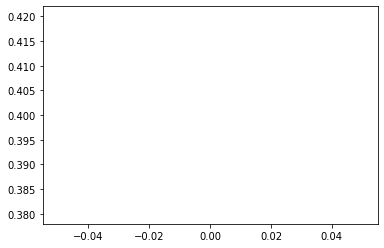

### Calculate Cav of V